In this Notebook, we tried different techniques of dimensionnality reduction and check their influence on the correlation of the features. 

In [1]:
""" Import librairies """
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Loading data

In [18]:
# Read 2 training datasets with/without outliers
data = pd.read_csv('../data/interim/train_without_outliers.csv')

# Split features and labels
X,y = data.drop('class',axis=1),data['class']


We saw before in the DataVisualization notebook that there was some correlation between the features u g z and r i. This is a problem for multiples algorithms.

We check correlation again after preprocessing the data.

Text(0.5, 1.0, 'Correlation matrix')

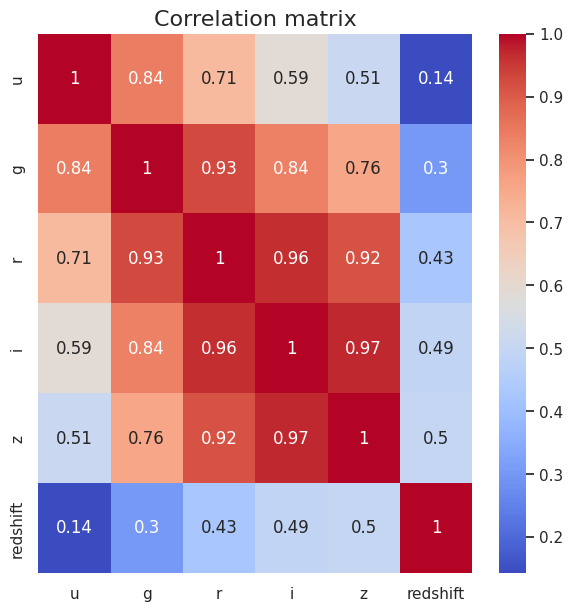

In [33]:
# Correlation matrix
sns.heatmap(X.corr(), cmap="coolwarm", cbar=True,annot=True)
# Make the matrix squarre
plt.gcf().set_size_inches(7,7)
plt.title('Correlation matrix', fontsize=16)



We can see that the correlation between features u g z r and i is very high. We can no longer see 2 groups (ugz & ri) as we have seen before data cleaning. We will try to remove this correlation. 

We try to remove correlation on ugz and ri separately first and on all the features then.

In [34]:
group_ugr = X[['u', 'g', 'r']]
group_iz = X[['i', 'z']]
group_ugriz = X[['u', 'g', 'r', 'i', 'z']]

## Using PCA

In [35]:
pca = PCA(n_components=3)
pca_ugr = pd.DataFrame(pca.fit_transform(group_ugr), columns=['pca_ugr_1', 'pca_ugr_2', 'pca_ugr_3'])
pca = PCA(n_components=2)
pca_iz = pd.DataFrame(pca.fit_transform(group_iz), columns=['pca_iz_1', 'pca_iz_2'])
pca = PCA(n_components=5)
pca_ugriz = pd.DataFrame(pca.fit_transform(group_ugriz), columns=['pca_ugriz_1', 'pca_ugriz_2', 'pca_ugriz_3', 'pca_ugriz_4', 'pca_ugriz_5'])

pca_1 = pd.concat([pca_ugr, pca_iz,data[["redshift"]]], axis=1)
pca_2 = pd.concat([pca_ugriz,data[["redshift"]]], axis=1)

Text(0.5, 1.0, 'Correlation matrix PCA with 1 group of features')

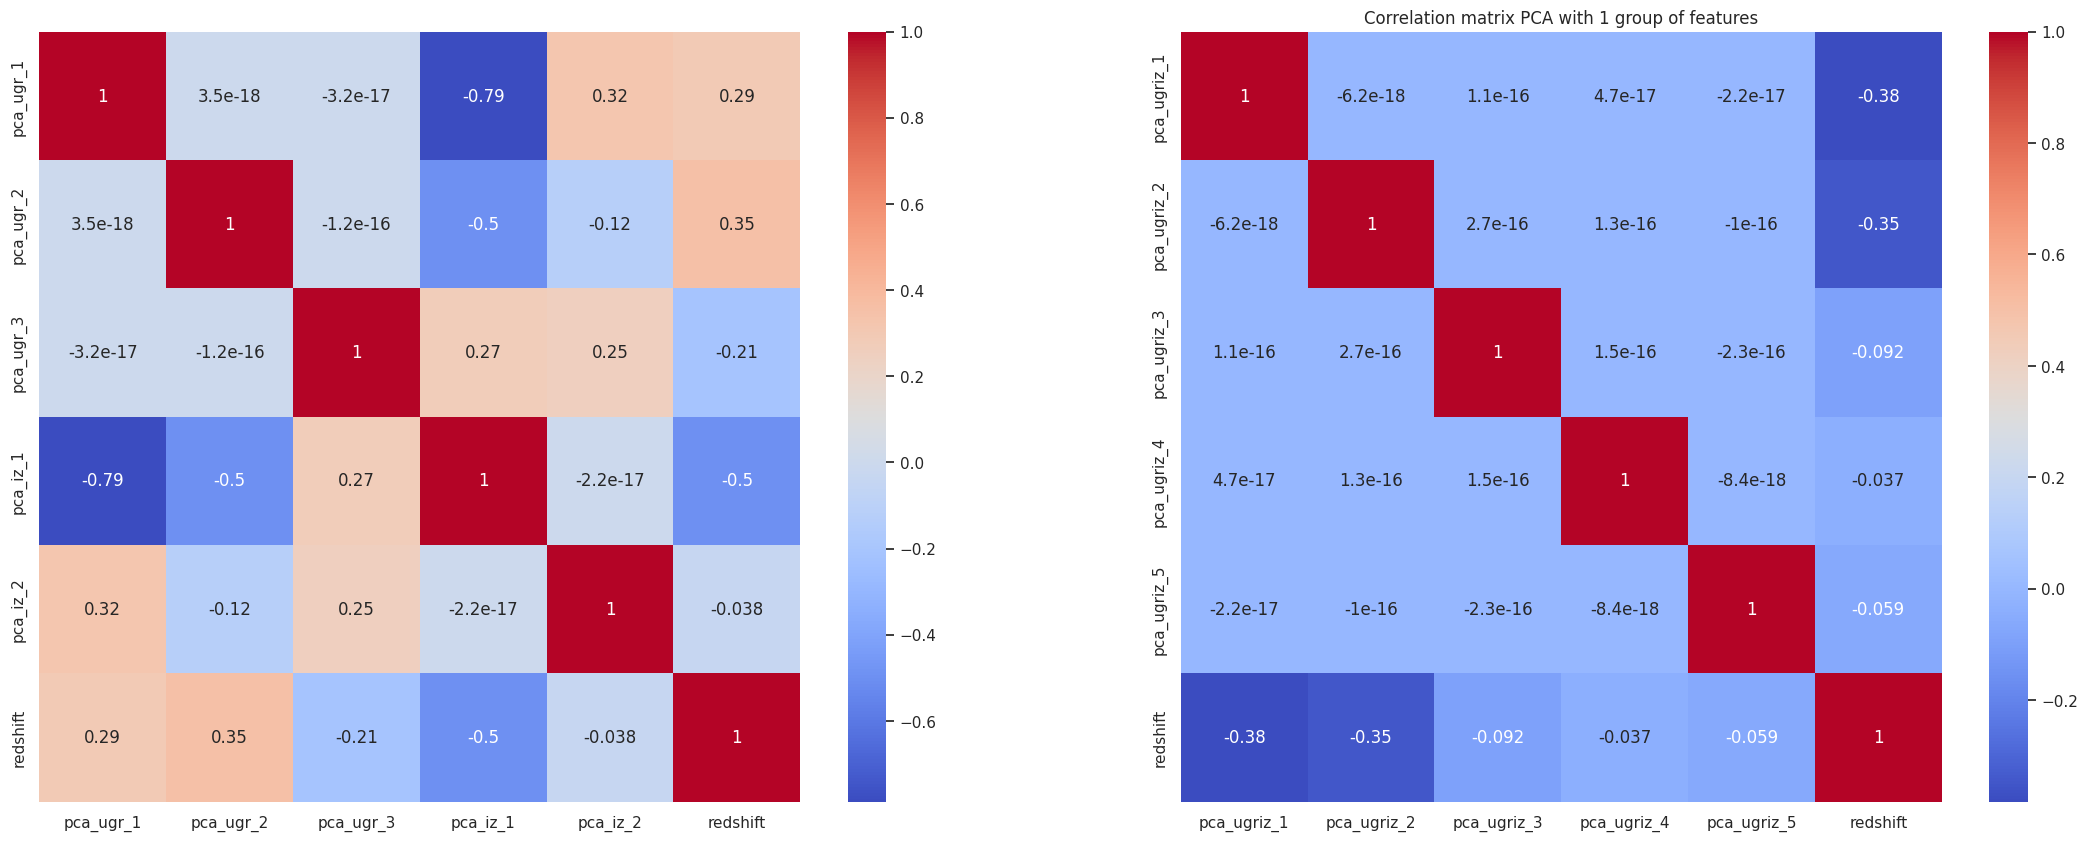

In [36]:
#subplot 2 matrix
fig, ax = plt.subplots(1, 2, figsize=(27, 10))
axes = ax.flatten()
sns.heatmap(pca_1.corr(), annot=True, cmap='coolwarm', ax=axes[0])
plt.title('Correlation matrix PCA with 2 group of features')
sns.heatmap(pca_2.corr(), annot=True, cmap='coolwarm', ax=axes[1])
plt.title('Correlation matrix PCA with 1 group of features')

## Using UMAP

In [18]:
reducer = umap.UMAP(n_components=3)
umap_ugr = pd.DataFrame(reducer.fit_transform(group_ugr), columns=['umap_ugr_1', 'umap_ugr_2', 'umap_ugr_3'])
reducer = umap.UMAP(n_components=2)
umap_iz = pd.DataFrame(reducer.fit_transform(group_iz), columns=['umap_iz_1', 'umap_iz_2'])
reducer = umap.UMAP(n_components=5)
umap_ugriz = pd.DataFrame(reducer.fit_transform(group_ugriz), columns=['umap_ugriz_1', 'umap_ugriz_2', 'umap_ugriz_3', 'umap_ugriz_4', 'umap_ugriz_5'])

umap_1 = pd.concat([umap_ugr, umap_iz,data[["redshift"]]], axis=1)
umap_2 = pd.concat([umap_ugriz,data[["redshift"]]], axis=1)

Text(0.5, 1.0, 'Correlation matrix PCA with 1 group of features')

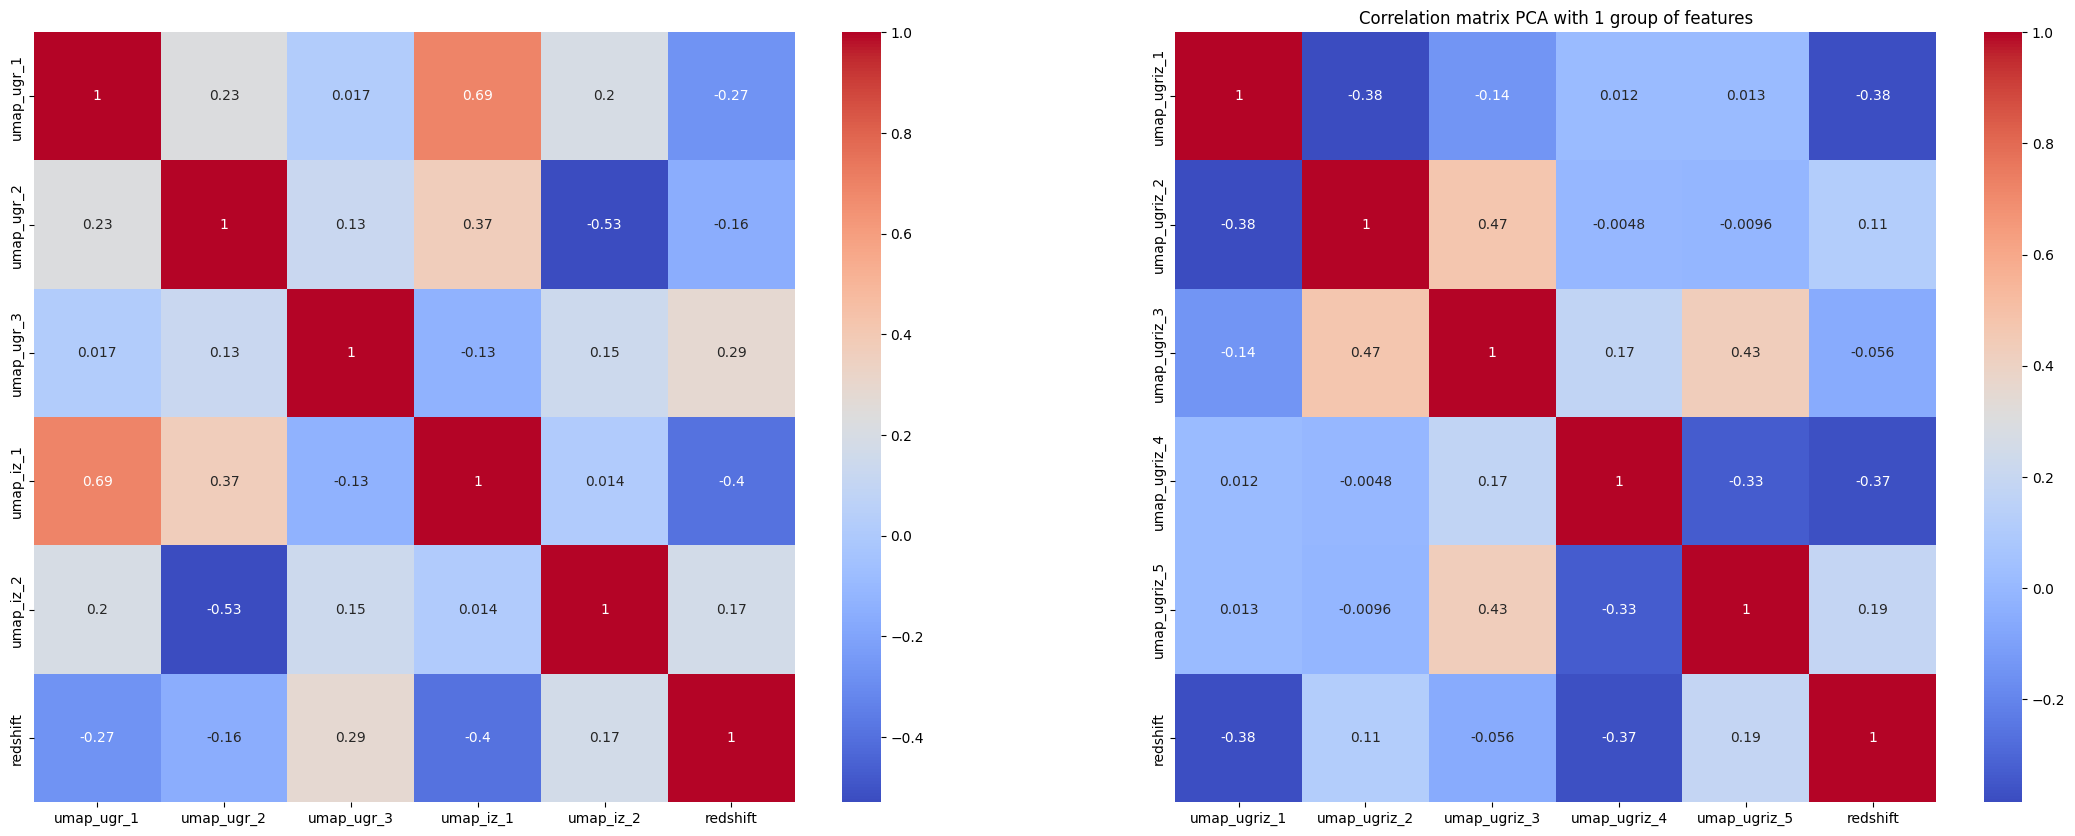

In [19]:
#subplot 2 matrix
fig, ax = plt.subplots(1, 2, figsize=(27, 10))
axes = ax.flatten()
sns.heatmap(umap_1.corr(), annot=True, cmap='coolwarm', ax=axes[0])
plt.title('Correlation matrix PCA with 2 group of features')
sns.heatmap(umap_2.corr(), annot=True, cmap='coolwarm', ax=axes[1])
plt.title('Correlation matrix PCA with 1 group of features')

## Using T-sne

In [25]:
tsne = TSNE(n_components=3)
tsne_ugr = pd.DataFrame(tsne.fit_transform(group_ugr), columns=['tsne_ugr_1', 'tsne_ugr_2', 'tsne_ugr_3'])
tsne = TSNE(n_components=2)
tsne_iz = pd.DataFrame(tsne.fit_transform(group_iz), columns=['tsne_iz_1', 'tsne_iz_2'])
tsne = TSNE(n_components=3)
tsne_ugriz = pd.DataFrame(tsne.fit_transform(group_ugriz), columns=['tsne_ugriz_1', 'tsne_ugriz_2', 'tsne_ugriz_3'])

tsne_1 = pd.concat([tsne_ugr, tsne_iz,data[["redshift"]]], axis=1)
tsne_2 = pd.concat([tsne_ugriz,data[["redshift"]]], axis=1)

Text(0.5, 1.0, 'Correlation matrix PCA with 1 group of features')

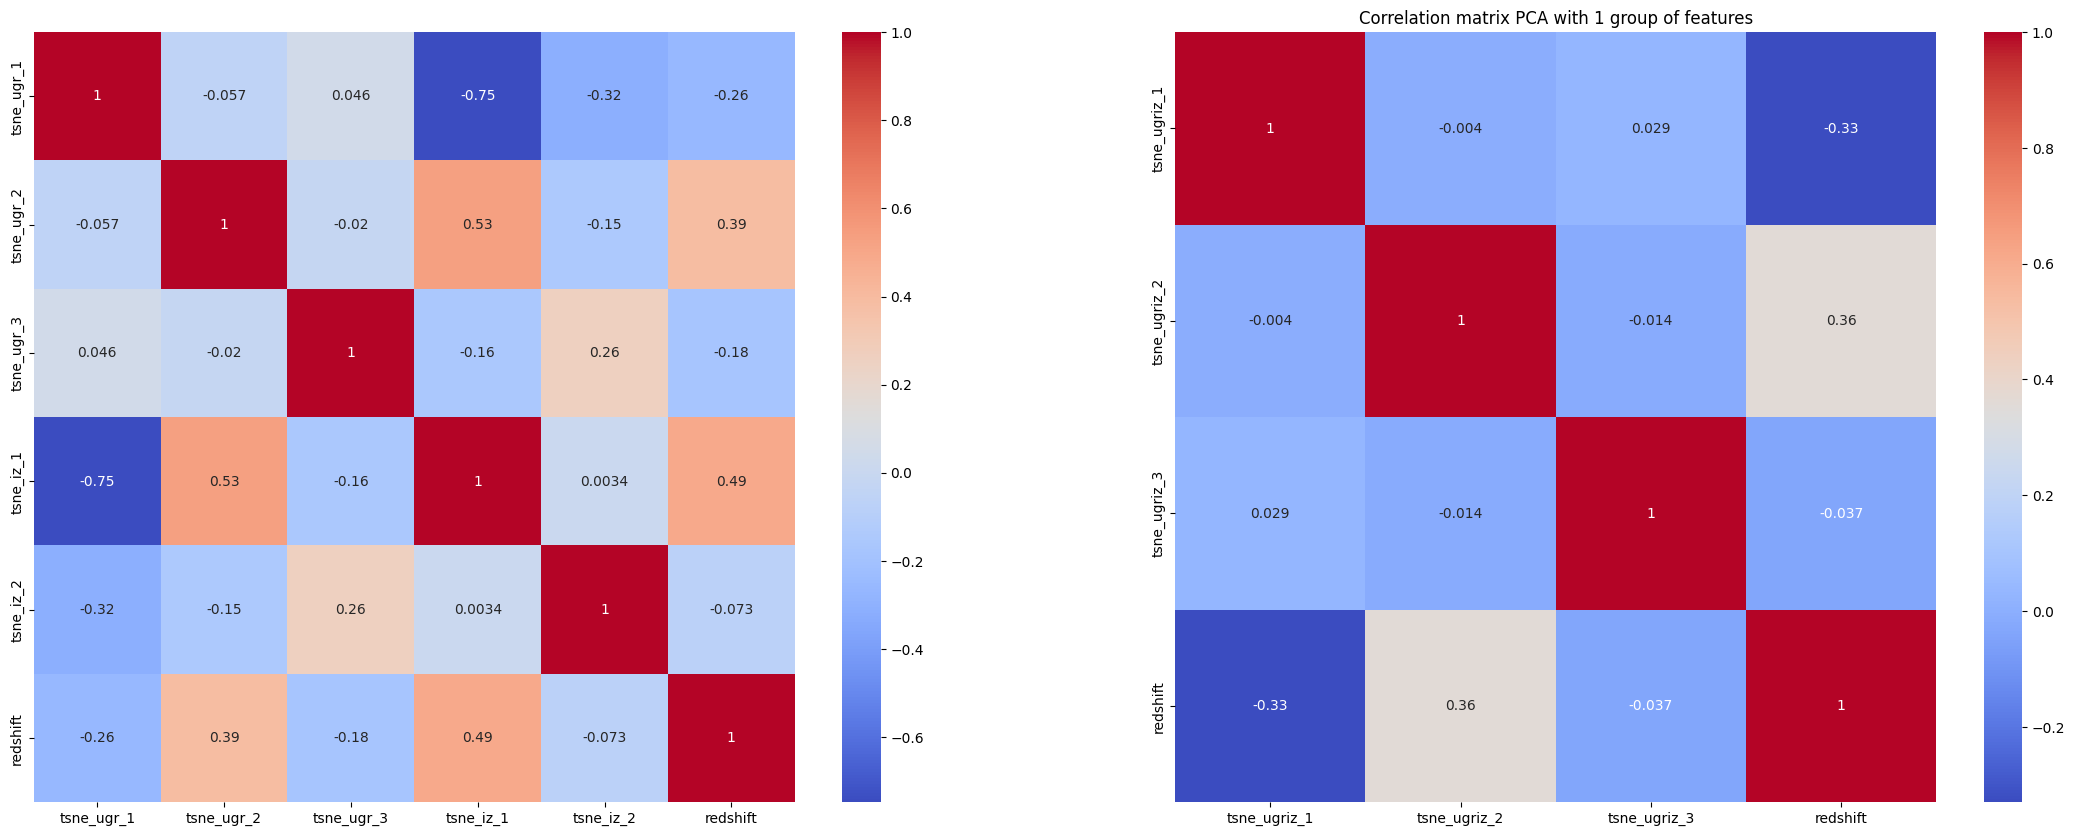

In [26]:
#subplot 2 matrix
fig, ax = plt.subplots(1, 2, figsize=(27, 10))
axes = ax.flatten()
sns.heatmap(tsne_1.corr(), annot=True, cmap='coolwarm', ax=axes[0])
plt.title('Correlation matrix PCA with 2 group of features')
sns.heatmap(tsne_2.corr(), annot=True, cmap='coolwarm', ax=axes[1])
plt.title('Correlation matrix PCA with 1 group of features')

## Conclusion

It is clear that applying the reductor on all the features is better than trying to do 2 groups. Aso PCA gives better results for removing correlation. The other advantage is that PCA is fast comparing to UMAP and TSNE. 